# Keras and convolutional nets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler


In [2]:
import tensorflow as tf

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\ten

In [3]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [5]:
from tensorflow.keras.layers import Activation

# Model Building

In [32]:
model = Sequential([
    Dense(32, input_shape =(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# Using the MNIST DATA

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


num_classes =10
#converting class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4945 - accuracy: 0.8670
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2463 - accuracy: 0.9303
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2044 - accuracy: 0.9425
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1766 - accuracy: 0.9503
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1560 - accuracy: 0.9553
Epoch 6/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1410 - accuracy: 0.9596
Epoch 7/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1291 - accuracy: 0.9632
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1187 - accuracy: 0.9663
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1086 - accuracy: 0.9683
Epoch 10/10
60

# Model evaluation

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1]))

Test loss: 0.115
Test Accuracy: 0.967


In [40]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 26us/sample - loss: 0.0971 - accuracy: 0.9713 - val_loss: 0.0753 - val_accuracy: 0.9795
Epoch 2/10
54000/54000 [==============================] - 1s 24us/sample - loss: 0.0905 - accuracy: 0.9737 - val_loss: 0.0801 - val_accuracy: 0.9777
Epoch 3/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 4/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0785 - val_accuracy: 0.9773
Epoch 5/10
54000/54000 [==============================] - 1s 23us/sample - loss: 0.0765 - accuracy: 0.9773 - val_loss: 0.0802 - val_accuracy: 0.9788
Epoch 6/10
54000/54000 [==============================] - 2s 37us/sample - loss: 0.0729 - accuracy: 0.9786 - val_loss: 0.0801 - val_accuracy: 0.9770
Epoch 7/10
54000/54000 [==============================] -

# Evaluating on Test set

In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1]))

Test loss: 0.115
Test Accuracy: 0.967


# Loggers and Callbacks

In [44]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5339 - accuracy: 0.8574 - val_loss: 0.2360 - val_accuracy: 0.9343
Epoch 2/100
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2622 - accuracy: 0.9266 - val_loss: 0.1917 - val_accuracy: 0.9468
Epoch 3/100
54000/54000 [==============================] - 1s 26us/sample - loss: 0.2156 - accuracy: 0.9389 - val_loss: 0.1660 - val_accuracy: 0.9550
Epoch 4/100
54000/54000 [==============================] - 1s 26us/sample - loss: 0.1839 - accuracy: 0.9464 - val_loss: 0.1485 - val_accuracy: 0.9580
Epoch 5/100
54000/54000 [==============================] - 1s 27us/sample - loss: 0.1618 - accuracy: 0.9531 - val_loss: 0.1396 - val_accuracy: 0.9593
Epoch 6/100
54000/54000 [==============================] - 1s 28us/sample - loss: 0.1456 - accuracy: 0.9581 - val_loss: 0.1328 - val_accuracy: 0.9625
Epoch 7/100
54000/54000 [==========================

Epoch 55/100
54000/54000 [==============================] - 1s 27us/sample - loss: 0.0172 - accuracy: 0.9959 - val_loss: 0.1382 - val_accuracy: 0.9680
Epoch 56/100
54000/54000 [==============================] - 1s 24us/sample - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.1368 - val_accuracy: 0.9693
Epoch 57/100
54000/54000 [==============================] - 1s 23us/sample - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.1403 - val_accuracy: 0.9682
Epoch 58/100
54000/54000 [==============================] - 1s 22us/sample - loss: 0.0154 - accuracy: 0.9963 - val_loss: 0.1447 - val_accuracy: 0.9683
Epoch 59/100
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.1446 - val_accuracy: 0.9690
Epoch 60/100
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0141 - accuracy: 0.9970 - val_loss: 0.1412 - val_accuracy: 0.9695
Epoch 61/100
54000/54000 [==============================] - 1s 22us/sample - loss: 0.0135 - ac

In [45]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel('accuracy')
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel('loss')

In [51]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.533851,0.857444,0.236043,0.934333
1,0.262219,0.926574,0.191714,0.946833
2,0.215633,0.938870,0.165951,0.955000
3,0.183920,0.946426,0.148502,0.958000
4,0.161826,0.953148,0.139639,0.959333
...,...,...,...,...
95,0.004302,0.999370,0.194340,0.966833
96,0.004525,0.999370,0.195996,0.967000
97,0.003161,0.999741,0.188504,0.969333
98,0.002650,0.999889,0.194489,0.968333


Text(0, 0.5, 'loss')

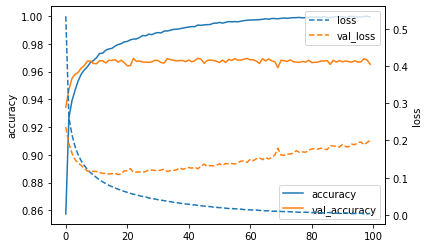

In [53]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel('accuracy')
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel('loss')